### Assignment: Download Kaggle dataset, perform data loading, cleaning, basic transformations using Pandas, and create at least three insightful visualizations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
original_data = pd.read_csv("./steam_data.csv")
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81048 entries, 0 to 81047
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           81048 non-null  object
 1   name          81043 non-null  object
 2   categories    80453 non-null  object
 3   img_url       81048 non-null  object
 4   user_reviews  81048 non-null  object
 5   all_reviews   81046 non-null  object
 6   date          81046 non-null  object
 7   developer     81045 non-null  object
 8   publisher     81048 non-null  object
 9   price         81048 non-null  object
 10  pegi          76765 non-null  object
 11  pegi_url      81048 non-null  object
dtypes: object(12)
memory usage: 7.4+ MB


In [3]:
original_data.isna().sum()

url                0
name               5
categories       595
img_url            0
user_reviews       0
all_reviews        2
date               2
developer          3
publisher          0
price              0
pegi            4283
pegi_url           0
dtype: int64

In [4]:
original_data.drop(columns=['img_url', 'user_reviews', 'pegi', 'pegi_url'], inplace=True)
original_data.head()

,url,name,categories,all_reviews,date,developer,publisher,price
0,https://store.steampowered.com/app/945360/Amon...,Among Us,Online PvPLAN PvPOnline Co-opLAN Co-opCross-Pl...,"Overwhelmingly Positive(224,878)- 95% of the 2...","Nov 16, 2018",Innersloth,Innersloth,Buy Among Us$4.99Add to Cart
1,https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive,Steam AchievementsFull controller supportSteam...,"Very Positive(4,843,904)- 87% of the 4,843,904...","Aug 21, 2012","Valve, Hidden Path Entertainment",Valve,Play Counter-Strike: Global OffensiveFree to P...
2,https://store.steampowered.com/app/1097150/Fal...,Fall Guys: Ultimate Knockout,MMOOnline PvPOnline Co-opSteam AchievementsFul...,"Very Positive(223,706)- 80% of the 223,706 use...","Aug 3, 2020",Mediatonic,Devolver Digital,Buy Fall Guys$19.99Add to Cart
3,https://store.steampowered.com/app/1158310/Cru...,Crusader Kings III,Single-playerOnline PvPSteam AchievementsSteam...,"Very Positive(18,951)- 92% of the 18,951 user ...","Sep 1, 2020",Paradox Development Studio,Paradox Interactive,Buy Crusader Kings III$49.99Add to Cart
4,https://store.steampowered.com/app/1085660/Des...,Destiny 2,Single-playerOnline PvPOnline Co-opSteam Achie...,"Very Positive(284,689)- 86% of the 284,689 use...","Oct 1, 2019",Bungie,Bungie,Play Destiny 2Free To PlayPlay Game


In [5]:
df = original_data.copy()

In [6]:
# Taking game ID from url

df["id"] = df["url"].str.split("/").str[4]

In [7]:
# Extracting Categories

categories = [
    "Online",
    "PvP",
    "LAN",
    "Co-op",
    "Cross-Platform",
    "Multiplayer",
    "Full controller",
    "Single-player",
    "Shared/Split Screen",
    "Captions available",
    "Downloadable Content",
    "In-App Purchases",
    "Profile Features Limited",
    "Steam Achievements",
]


df["categories"] = df["categories"].apply(
    lambda x: [cat for cat in categories if cat in str(x)]
)

df.head()

,url,name,categories,all_reviews,date,developer,publisher,price,id
0,https://store.steampowered.com/app/945360/Amon...,Among Us,"[Online, PvP, LAN, Co-op, Cross-Platform, Mult...","Overwhelmingly Positive(224,878)- 95% of the 2...","Nov 16, 2018",Innersloth,Innersloth,Buy Among Us$4.99Add to Cart,945360
1,https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive,"[Full controller, In-App Purchases, Steam Achi...","Very Positive(4,843,904)- 87% of the 4,843,904...","Aug 21, 2012","Valve, Hidden Path Entertainment",Valve,Play Counter-Strike: Global OffensiveFree to P...,730
2,https://store.steampowered.com/app/1097150/Fal...,Fall Guys: Ultimate Knockout,"[Online, PvP, Co-op, Full controller, In-App P...","Very Positive(223,706)- 80% of the 223,706 use...","Aug 3, 2020",Mediatonic,Devolver Digital,Buy Fall Guys$19.99Add to Cart,1097150
3,https://store.steampowered.com/app/1158310/Cru...,Crusader Kings III,"[Online, PvP, Single-player, Steam Achievements]","Very Positive(18,951)- 92% of the 18,951 user ...","Sep 1, 2020",Paradox Development Studio,Paradox Interactive,Buy Crusader Kings III$49.99Add to Cart,1158310
4,https://store.steampowered.com/app/1085660/Des...,Destiny 2,"[Online, PvP, Co-op, Full controller, Single-p...","Very Positive(284,689)- 86% of the 284,689 use...","Oct 1, 2019",Bungie,Bungie,Play Destiny 2Free To PlayPlay Game,1085660


In [8]:

# Extracting Reviews

df["positive_review_pct"] = df["all_reviews"].str.extract(r"(\d+)%").astype(float)

df.head()

,url,name,categories,all_reviews,date,developer,publisher,price,id,positive_review_pct
0,https://store.steampowered.com/app/945360/Amon...,Among Us,"[Online, PvP, LAN, Co-op, Cross-Platform, Mult...","Overwhelmingly Positive(224,878)- 95% of the 2...","Nov 16, 2018",Innersloth,Innersloth,Buy Among Us$4.99Add to Cart,945360,95.0
1,https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive,"[Full controller, In-App Purchases, Steam Achi...","Very Positive(4,843,904)- 87% of the 4,843,904...","Aug 21, 2012","Valve, Hidden Path Entertainment",Valve,Play Counter-Strike: Global OffensiveFree to P...,730,87.0
2,https://store.steampowered.com/app/1097150/Fal...,Fall Guys: Ultimate Knockout,"[Online, PvP, Co-op, Full controller, In-App P...","Very Positive(223,706)- 80% of the 223,706 use...","Aug 3, 2020",Mediatonic,Devolver Digital,Buy Fall Guys$19.99Add to Cart,1097150,80.0
3,https://store.steampowered.com/app/1158310/Cru...,Crusader Kings III,"[Online, PvP, Single-player, Steam Achievements]","Very Positive(18,951)- 92% of the 18,951 user ...","Sep 1, 2020",Paradox Development Studio,Paradox Interactive,Buy Crusader Kings III$49.99Add to Cart,1158310,92.0
4,https://store.steampowered.com/app/1085660/Des...,Destiny 2,"[Online, PvP, Co-op, Full controller, Single-p...","Very Positive(284,689)- 86% of the 284,689 use...","Oct 1, 2019",Bungie,Bungie,Play Destiny 2Free To PlayPlay Game,1085660,86.0


In [9]:
# Extracting Price

df.loc[df["price"].str.contains("Free To Play", case=False, na=False), "price"] = "0.00"
df["price"] = df["price"].str.extract(r"\$?(\d+(?:\.\d+)?)")
df["price"] = df["price"].astype(float)

df.head()

,url,name,categories,all_reviews,date,developer,publisher,price,id,positive_review_pct
0,https://store.steampowered.com/app/945360/Amon...,Among Us,"[Online, PvP, LAN, Co-op, Cross-Platform, Mult...","Overwhelmingly Positive(224,878)- 95% of the 2...","Nov 16, 2018",Innersloth,Innersloth,4.99,945360,95.0
1,https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive,"[Full controller, In-App Purchases, Steam Achi...","Very Positive(4,843,904)- 87% of the 4,843,904...","Aug 21, 2012","Valve, Hidden Path Entertainment",Valve,0.00,730,87.0
2,https://store.steampowered.com/app/1097150/Fal...,Fall Guys: Ultimate Knockout,"[Online, PvP, Co-op, Full controller, In-App P...","Very Positive(223,706)- 80% of the 223,706 use...","Aug 3, 2020",Mediatonic,Devolver Digital,19.99,1097150,80.0
3,https://store.steampowered.com/app/1158310/Cru...,Crusader Kings III,"[Online, PvP, Single-player, Steam Achievements]","Very Positive(18,951)- 92% of the 18,951 user ...","Sep 1, 2020",Paradox Development Studio,Paradox Interactive,49.99,1158310,92.0
4,https://store.steampowered.com/app/1085660/Des...,Destiny 2,"[Online, PvP, Co-op, Full controller, Single-p...","Very Positive(284,689)- 86% of the 284,689 use...","Oct 1, 2019",Bungie,Bungie,0.00,1085660,86.0


In [10]:
# Coverting date into a standard format

df["release_date"] = pd.to_datetime(df["date"], errors="coerce")

In [11]:
# Dropping unwanted columns and reordering

df.drop(
    columns=[
        "url",
        "date",
        "all_reviews",
    ],
    inplace=True,
)

df = df[
    [
        "id",
        "name",
        "release_date",
        "price",
        "developer",
        "publisher",
        "categories",
        "positive_review_pct",
    ]
]

df.head()

,id,name,release_date,price,developer,publisher,categories,positive_review_pct
0,945360,Among Us,2018-11-16,4.99,Innersloth,Innersloth,"[Online, PvP, LAN, Co-op, Cross-Platform, Mult...",95.0
1,730,Counter-Strike: Global Offensive,2012-08-21,0.00,"Valve, Hidden Path Entertainment",Valve,"[Full controller, In-App Purchases, Steam Achi...",87.0
2,1097150,Fall Guys: Ultimate Knockout,2020-08-03,19.99,Mediatonic,Devolver Digital,"[Online, PvP, Co-op, Full controller, In-App P...",80.0
3,1158310,Crusader Kings III,2020-09-01,49.99,Paradox Development Studio,Paradox Interactive,"[Online, PvP, Single-player, Steam Achievements]",92.0
4,1085660,Destiny 2,2019-10-01,0.00,Bungie,Bungie,"[Online, PvP, Co-op, Full controller, Single-p...",86.0


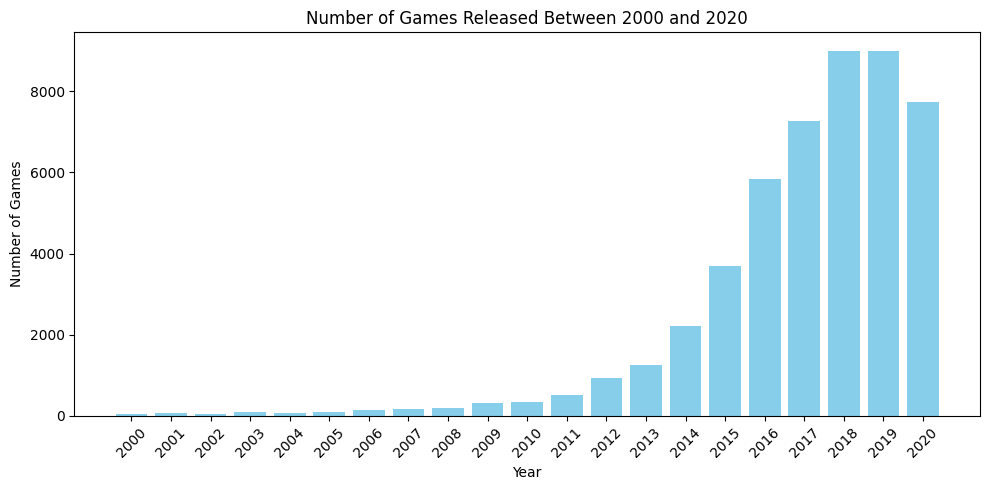

In [12]:
# Plotting Number of games released between the year 2000 and 2020

df['release_year'] = df['release_date'].dt.year
filtered_df = df.dropna(subset=['release_year']).copy()
filtered_df['release_year'] = filtered_df['release_year'].astype(int)

filtered_df = filtered_df[(filtered_df['release_year'] >= 2000) & (filtered_df['release_year'] <= 2020)]
release_counts = filtered_df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(release_counts.index.astype(str), release_counts.values, color='skyblue')
plt.title('Number of Games Released Between 2000 and 2020')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

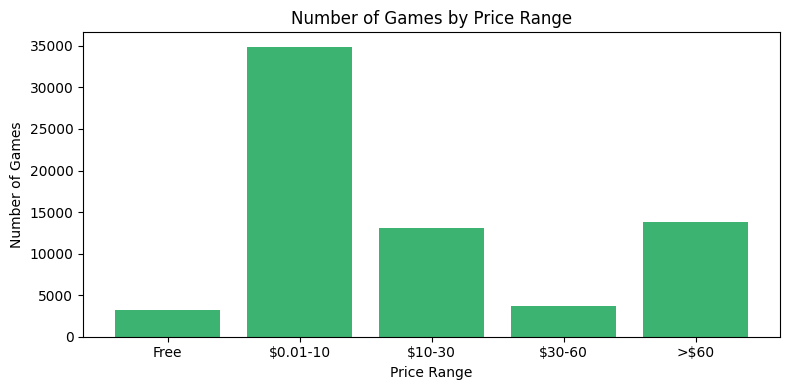

In [13]:
# Plotting the number of games by price range

bins = [0, 0.01, 10, 30, 60, df['price'].max()]
labels = ['Free', '$0.01-10', '$10-30', '$30-60', '>$60']
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

price_counts = df['price_range'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.bar(price_counts.index.astype(str), price_counts.values, color='mediumseagreen')
plt.title('Number of Games by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Games')
plt.tight_layout()
plt.show()

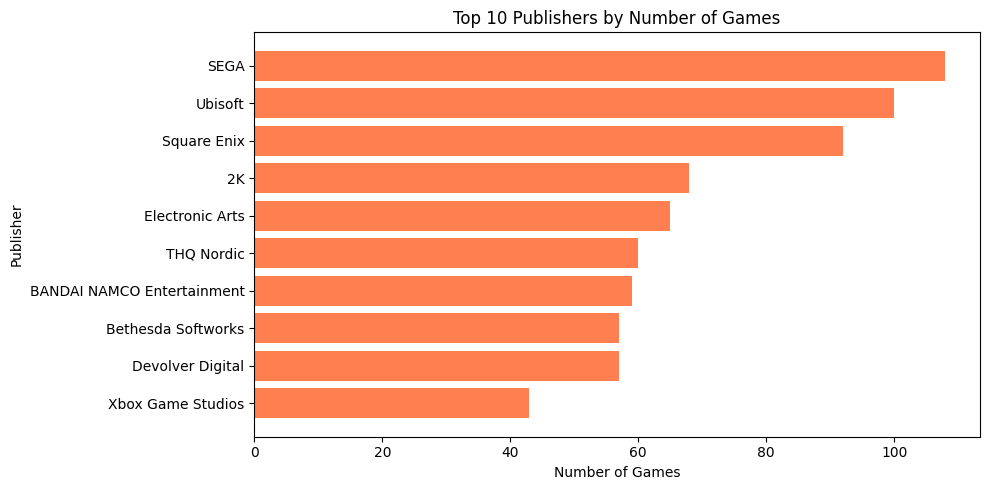

In [14]:
# Plotting the top 10 publisher by number of games

df['publisher'] = df['publisher'].replace(['-', '', 'nan', 'NaN'], pd.NA)
publisher_counts = df['publisher'].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
plt.barh(publisher_counts.index[::-1], publisher_counts.values[::-1], color='coral')
plt.title('Top 10 Publishers by Number of Games')
plt.xlabel('Number of Games')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

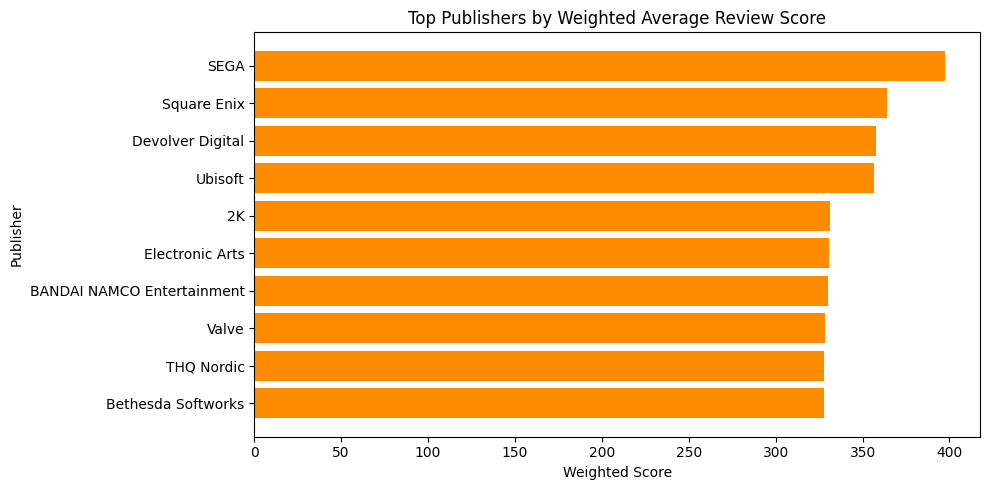

In [15]:
# Plotting the top publishers by weighted average review

publisher_group = df.groupby('publisher').agg(
    avg_review=('positive_review_pct', 'mean'),
    game_count=('id', 'count')
)

publisher_group['score'] = publisher_group['avg_review'] * np.log1p(publisher_group['game_count'])

top_publishers = publisher_group.sort_values('score', ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.barh(top_publishers.index[::-1], top_publishers['score'][::-1], color='darkorange')
plt.title('Top Publishers by Weighted Average Review Score')
plt.xlabel('Weighted Score')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()